In [48]:
#pytorch
import torch    
from torch import nn   
import matplotlib.pyplot as plt    
import numpy as np

print(torch.__version__)



2.2.0+cpu


In [49]:
print(torch.__version__)

2.2.0+cpu


In [50]:
#Create weight and bias
m=0.7
c=0.3

start=0
end =1
step=0.02

# X=torch.arrange(start,end,step).unsqueeze(dim=1)
X = torch.arange(start,end,end).unsqueeze(dim=1)
y=m*X +c
X[:10],y[:10]

(tensor([[0]]), tensor([[0.3000]]))

In [51]:
#split data
train_split =int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test =X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(0, 0, 1, 1)

In [52]:
def plot_data(training_X=X_train,training_y =y_train,testing_X=X_test,testing_y=y_test,prediction=None):
    plt.figure(figsize=(10,7))
    #plot trainign data
    plt.scatter(training_X,training_y,c='b',s=4,label="Training Data")
    # testingdata
    plt.scatter(training_X,training_y,c='g',s=4,label="Testing Data")
    if prediction is not None:
        plt.scatter(testing_X,prediction,c="r",s=4,label="Prediction Data")
        
    plt.legend(prop={"size":12});


In [53]:
class LinearRegressionMode(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights+x*self.bias
        

In [54]:
torch.manual_seed(42)
model_0 = LinearRegressionMode()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [55]:
#let us make prediction

with torch.inference_mode():
    y_preds = model_0(X_test)
    

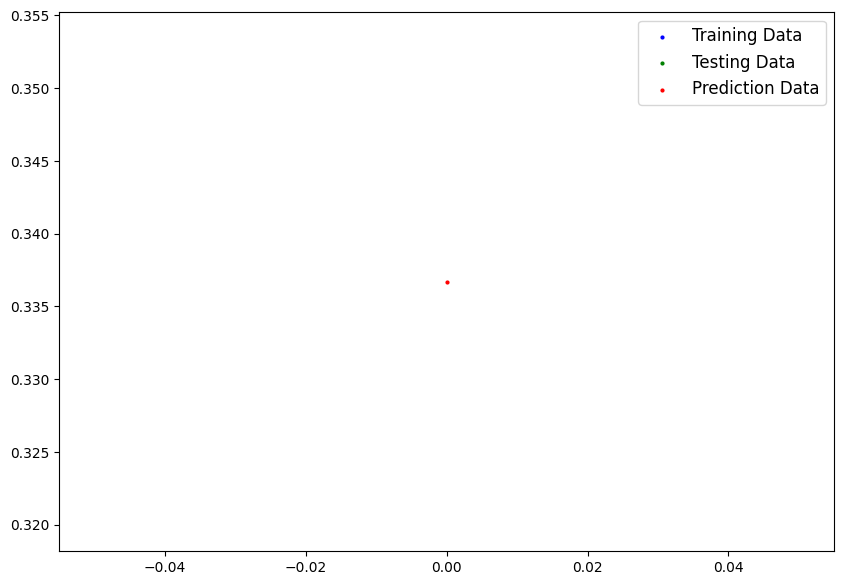

In [56]:
plot_data(prediction=y_preds)

In [65]:
#Setup loss function
loss_fn =nn.MSELoss()
optimizer = torch.optim.SGD(params=model_0.parameters())

In [68]:
torch.manual_seed(42)

epochs=500


trainLossList=[]
testLossList =[]

for epoch in range(epochs):
    ###training
    model_0.train()
    
    #forward pass
    y_preds = model_0(X_train)
    
    #calculate loass
    loss=  loss_fn(y_train,y_preds)
    
    optimizer.zero_grad()
        
    loss.backward()
        
    optimizer.step()
   
   ##testing
    with torch.inference_mode():
       test_preds=model_0(X_test)
       test_loss = loss_fn(y_test,y_preds)
    
    if  epoch%100 == 0:
        print(f'Epoch:{epoch}| Train loss:{loss} | test Loss:{test_loss}')
        
    trainLossList.append(loss.detach().numpy())
    testLossList.append(test_loss.detach().numpy())

Epoch:0| Train loss:nan | test Loss:nan
Epoch:100| Train loss:nan | test Loss:nan
Epoch:200| Train loss:nan | test Loss:nan
Epoch:300| Train loss:nan | test Loss:nan


C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([0, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:400| Train loss:nan | test Loss:nan


In [ ]:
plt.plot(range(epochs),trainLossList,label="Training Loss")
plt.plot(range(epochs),testLossList,label="Testing Loss")
plt.xlabel
plt.ylabel

In [ ]:
from pathlib import Path()
#create model directory

MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents =True,exist_ok =True)

#create model save path

MODEL_NAME ="00_pytorch_linear_regresion_0.pth"
MODEL_SAVE_PATH =MODEL_PATH/MODEL_NAME

print(f())